In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

import inspect, os.path

filename = inspect.getframeinfo(inspect.currentframe()).filename
path     = os.path.dirname(os.path.abspath(filename))
print(os.path.join(path, 'content/file.dot'))

/home/tim/git/ms-thesis/code/graph_gen/content/file.dot


In [2]:
import maze

from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_pydot import write_dot, read_dot
import networkx as nx

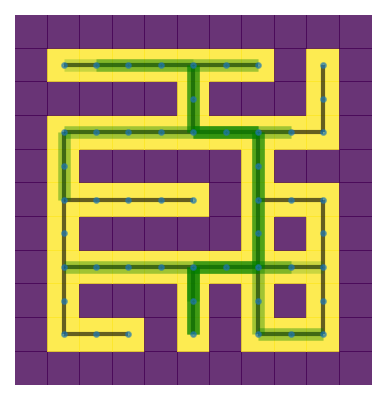

In [3]:
from routes import Mgraph

mg = Mgraph(11)
g, pos = mg.G, mg.pos

selected = np.random.randint(0, len(mg.nodes), size = 15)
routes = np.vstack((selected[:-1], selected[1:]))
datasetgt, trajs = mg.gen_routes(routes)

fig = plt.figure(num = "field3", figsize=(3,3), dpi = 150)
mg.plot_field(fig)
nx.draw(g, pos, alpha = 0.6, node_size = 5, width = 2)
for ti in trajs:
    H = g.subgraph(ti)
    nx.draw_networkx_edges(H, pos = pos, edge_color='g', width = 6, alpha=0.2)
plt.show()

In [4]:
# !pip install pydot

In [5]:
from networkx.drawing.nx_agraph import graphviz_layout
# from networkx.drawing.nx_pydot import write_dot, read_dot
from networkx.readwrite.json_graph import jit_data, jit_graph
import json

saveto_z = os.path.join(path, 'content/graph.dat')
saveto_g = os.path.join(path, 'content/file.json')

data = jit_data(g)
with open(saveto_g, 'w') as file:
        json.dump(data, file)
mg.Z.tofile(saveto_z)

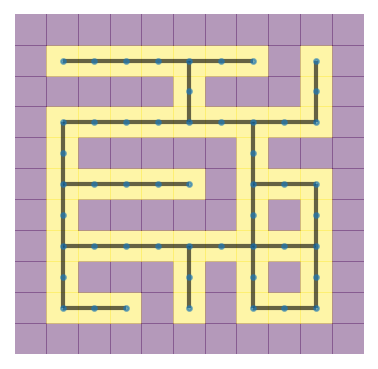

In [6]:
# learn howto read and rwite graph to json file
# data = None

# with open(saveto_g, "r") as read_file:
#     data = json.load(read_file)
# gr = jit_graph(data)

n = mg.boxsize

Z = np.fromfile(saveto_z)
Z = Z.reshape(mg.boxsize, -1)
# print(Z)

# mg = Mgraph(gr, Z)

mg_new = Mgraph(n, g, mg.Z)
# mg_new = Mgraph(gr, Z) # saving to json doesn.t work here

gr = mg_new.G
pos = mg_new.pos

fig = plt.figure(num = "routes", figsize=(3,3), dpi = 150)

# mg_new.plot_field(fig)

offx, offy = 0, 0
x = np.arange(offx, mg_new.boxsize + offy, 1)
y = np.arange(offx, mg_new.boxsize + offy, 1)
plt.pcolormesh(y, x, Z.T, alpha=0.4, shading='auto')
# plt.pcolormesh(x, y, Z, alpha=0.4, shading='auto')

nx.draw(gr, pos, alpha = 0.6, node_size = 5, width = 2)
plt.show()

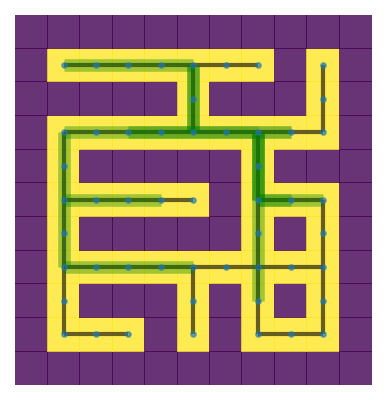

In [7]:
def gen_routes(mg, n):
    selected = np.random.randint(0, len(mg.G.nodes), size = n)
    routes = np.vstack((selected[:-1], selected[1:]))
    datasetgt, trajs = mg.gen_routes(routes)
    return datasetgt, trajs

mg = mg_new

datasetgt, trajs = gen_routes(mg, 15)

fig = plt.figure(num = "routes", figsize=(3,3), dpi = 150)
mg.plot_field(fig)
nx.draw(g, pos = pos, alpha = 0.6, node_size = 5, width = 2)
for ti in trajs:
    H = g.subgraph(ti)
    nx.draw_networkx_edges(H, pos = pos, edge_color='g', width = 6, alpha=0.2)

plt.savefig(os.path.join(path, 'content/routes.png'))
plt.show()

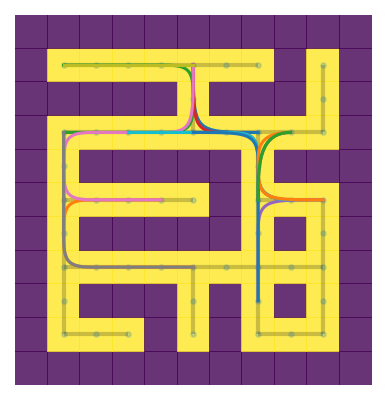

In [8]:
import geomdl
from geomdl import BSpline
from geomdl import utilities

plt.close()
fig = plt.figure(num = "bspline", figsize=(3,3), dpi = 150)

mg.plot_field(fig)
nx.draw(g, pos = pos, alpha = 0.2, node_size = 5, width = 2)
# plt.show()

# x = np.arange(-0.5, boxsize - 0.5, 1)
# y = np.arange(-0.5, boxsize - 0.5, 1)
# plt.pcolormesh(y, x, Z.T, alpha=0.2)
# nx.draw(G, pos=pos, alpha=0.3, node_size=5, width=2)

ds = []

for tr in datasetgt:
  if tr.shape[0] > 3:
    curve = BSpline.Curve()
    curve.degree = 3

    curve.ctrlpts = tr.tolist()
    curve.knotvector = utilities.generate_knot_vector(curve.degree, len(curve.ctrlpts))
    pts = np.array(curve.evalpts)

    ds.append(pts)
    plt.plot(pts[:, 0], pts[:, 1])

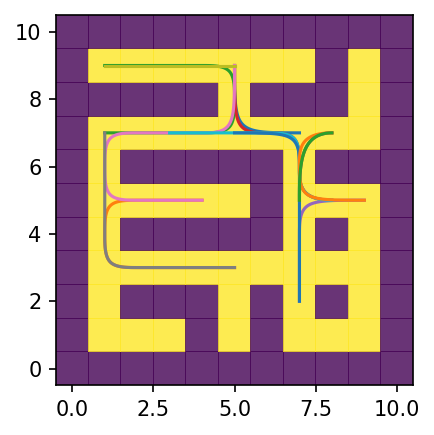

In [49]:
fig = plt.figure(figsize=(3,3), dpi = 150)
mg.plot_field(fig)
plt.tight_layout()

for pts in ds:
    plt.plot(pts[:, 0], pts[:, 1])

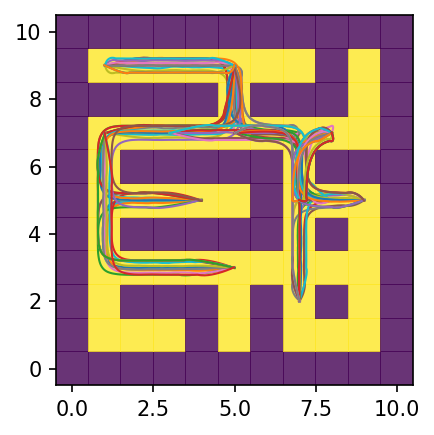

In [69]:
from NoisyTraj import NoisyTraj

fig = plt.figure(figsize=(3,3), dpi = 150)
mg.plot_field(fig)
plt.tight_layout()

noisy_dat = []

for tr in datasetgt:
    nt = NoisyTraj(tr)
    if nt.curve == None:
        continue
    obs = nt.data_gen()
    # obs = nt.data_gen(8)
    noisy_dat.append(obs)
    for oi in obs:
        plt.plot(oi[0, :], oi[1, :], linewidth = 1)

plt.show()

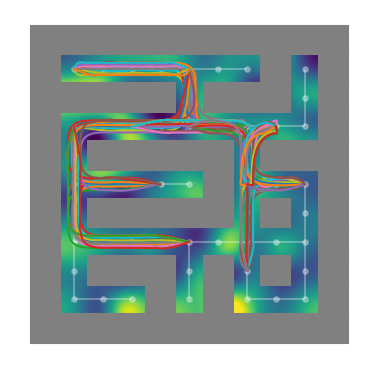

In [94]:
from scipy.interpolate import interpolate
import matplotlib.patches as patches


G, Z = mg.G, mg.Z
boxsize = mg.boxsize

extent = (0.5, boxsize - 1.5, 0.5, boxsize - 1.5)
x = np.linspace(extent[0], extent[1], boxsize - 1)
y = np.linspace(extent[0], extent[1], boxsize - 1)

# np.linspace()

xx, yy = np.meshgrid(x, y)

z = np.random.randn(boxsize - 1, boxsize - 1)
interp = interpolate.interp2d(xx, yy, z, kind='linear')
zz = interp(x, y)

fig = plt.figure(figsize=(3,3), dpi = 150)
ax = plt.gca()

# fig, axs = plt.subplots(nrows=1, ncols=1, subplot_kw={'xticks': [], 'yticks': []})
# axs.set_aspect('equal')
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi = 150, subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(zz, interpolation='spline36', resample=True, extent = extent)

plt.axis("equal")

nx.draw(G, pos=pos, alpha=0.3, node_size=5, width=1, edge_color='w', node_color='w')

# plt.scatter(xx, yy, color='r')

for i in range(boxsize):
  for j in range(boxsize):
    if Z[i][j] == 0:
      rect = patches.Rectangle(xy = (i - 0.5, j - 0.5), width = 1., height=1., color = 'gray')
      ax.add_patch(rect)

for obs in noisy_dat:
    for oi in obs:
        plt.plot(oi[0, :], oi[1, :], linewidth = 1)
 
plt.show()

In [12]:

import json
import os.path
import inspect

import numpy as np
import pandas as pd
nums = np.random.randn(3, 3)

f = {0: nums, 1: "1", index = 0}
ds = pd.DataFrame(f, dtype=object)
# ds = pd.DataFrame(np.ndarray([nums, "1"], dtype=object))
z = ds.to_json(orient='values')
pd.read_json(z, orient='values')[0]


SyntaxError: invalid syntax (<ipython-input-12-1deabd78bf35>, line 9)

In [14]:
import json
r = {'nums': nums, 'rating': 3.5}
r = json.dumps(r)
loaded_r = json.loads(r)
loaded_r['nums']

TypeError: Object of type ndarray is not JSON serializable